# **The Economics of Happiness**



## Abstract: 

•	 Analyze happiness index through 2015-2019

•	 Compare if classification or regression is better for the dataset

•	Use AutoML to predict best model

•	To determine which indicators have most affect on happiness index and predict that attribute for next year using SHAP


##**Context:**


The World Happiness Report is a journal that publishes essays and rankings of national happiness based on respondents' assessments of their own lives, which the report also correlates with numerous (quality of life) aspects. Finland had won the title of world's happiest nation five times in a row as of March 2022.
The Sustainable Development Solutions Network, an international project of the UN, published the paper. The Gallup World Poll is the main source of information for this report. The World Happiness Report website offers public downloads of each annual report.	


##**Objective:**
The goal of this study is to determine which economic indicators contribute
The six life evaluation elements that the World Happiness Report rates nations on have no bearing on the overall score that is provided for each nation; rather, they are a mechanism for each nation to explain the implications of the happiness score.
Through the coherence of political system and population, this study will determine, explain, and depict the happiness level of various countries.


In [162]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
#importing Packages
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
import matplotlib.ticker as mtick 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import norm, skew #for some statistics
from scipy import stats



In [163]:
#Reading Dat
from google.colab import files 
uploaded = files.upload()

Saving TEH_World_Happiness_2015_2019_Imputed.csv to TEH_World_Happiness_2015_2019_Imputed (7).csv


In [164]:
happy = pd.read_csv("/content/TEH_World_Happiness_2015_2019_Imputed.csv") 

## **DATA PROFILE**

In [165]:
happy_new=happy.copy()

In [166]:
happy.head()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [167]:
happy_new.head()

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [168]:
happy.dtypes

Country             object
Happiness rank       int64
Happiness Score    float64
GDP per capita     float64
Social support     float64
Healthy life       float64
Freedom            float64
Generosity         float64
Corruption         float64
Year                 int64
dtype: object

In [169]:
happy.isnull().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     5
Social support     5
Healthy life       5
Freedom            5
Generosity         5
Corruption         7
Year               0
dtype: int64

There are no missing values in the Country, Happiness Rank, Happiness Score, or Year columns, which are all of the object type. GDP per capita lacks five components: Social Support, Healthly Life, Freedom, and Generosity. Additionally, corruption has seven missing values.

In [170]:
happy=happy.drop(columns='Country')


In [171]:
happy.dtypes

Happiness rank       int64
Happiness Score    float64
GDP per capita     float64
Social support     float64
Healthy life       float64
Freedom            float64
Generosity         float64
Corruption         float64
Year                 int64
dtype: object

In [172]:
#import KNNmputer
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(missing_values=np.nan)

happy_imputed=pd.DataFrame(knn_imputer.fit_transform(happy))
happy_imputed.columns=happy.columns
happy_imputed.index=happy.index

In [173]:
happy['Country']=happy_new['Country']

In [174]:
happy_new=happy_new.drop(columns='Country')

In [175]:
happy.dtypes

Happiness rank       int64
Happiness Score    float64
GDP per capita     float64
Social support     float64
Healthy life       float64
Freedom            float64
Generosity         float64
Corruption         float64
Year                 int64
Country             object
dtype: object

In [176]:
happy_imputed.isnull().sum()

Happiness rank     0
Happiness Score    0
GDP per capita     0
Social support     0
Healthy life       0
Freedom            0
Generosity         0
Corruption         0
Year               0
dtype: int64

The missing values have been removed from the dataset.

# **Analyzing the numeric features**

* A quantifiable trait with numerical values is known as a numeric variable, sometimes known as a quantitative variable . There are two types of numerical variables: continuous and discrete.

* Examining the independent variable distribution for our data frames.

<Figure size 648x360 with 0 Axes>

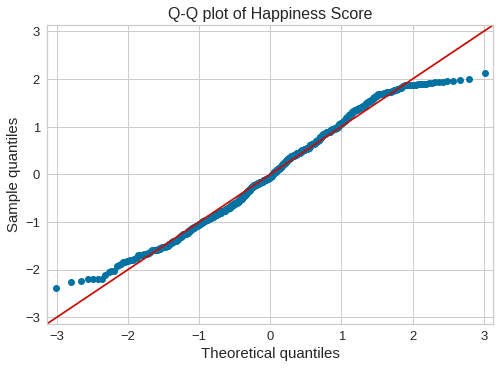

<Figure size 648x360 with 0 Axes>

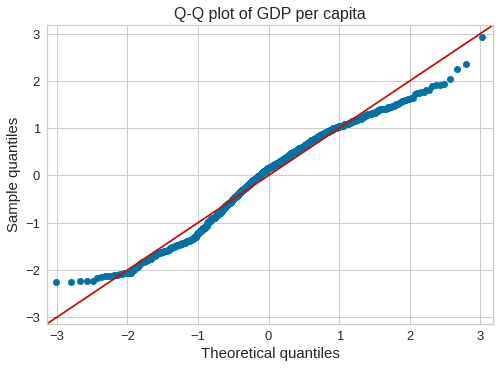

<Figure size 648x360 with 0 Axes>

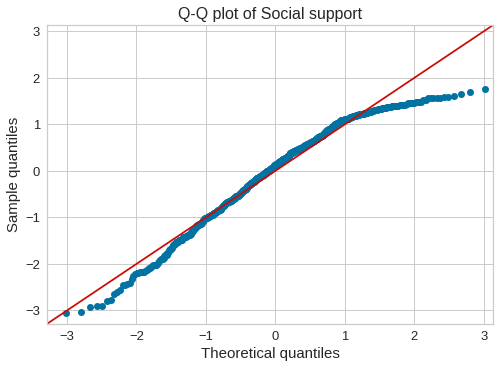

<Figure size 648x360 with 0 Axes>

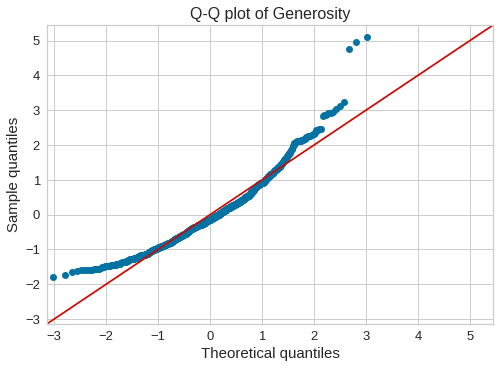

<Figure size 648x360 with 0 Axes>

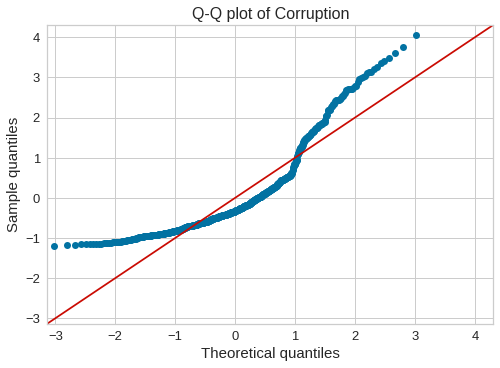

<Figure size 648x360 with 0 Axes>

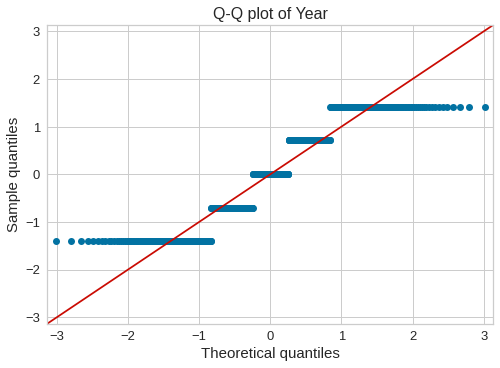

In [177]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=happy_imputed[['Happiness Score', 'GDP per capita', 'Social support' ,  'Generosity' , 'Corruption','Year']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(9,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

# **Examining the relationships between all of the data's features.**

In [178]:
happy_imputed.corr()

,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
Happiness rank,1.000000,-0.992066,-0.800552,-0.644153,-0.746606,-0.531997,-0.115543,-0.374536,-0.007768
Happiness Score,-0.992066,1.000000,0.795234,0.645147,0.746384,0.545418,0.136228,0.400190,0.007065
GDP per capita,-0.800552,0.795234,1.000000,0.573053,0.777088,0.351915,-0.004233,0.319753,0.019765
Social support,-0.644153,0.645147,0.573053,1.000000,0.568055,0.426477,-0.039928,0.124351,0.377798
Healthy life,-0.746606,0.746384,0.777088,0.568055,1.000000,0.331892,0.020142,0.254168,0.131585
Freedom,-0.531997,0.545418,0.351915,0.426477,0.331892,1.000000,0.266861,0.460505,0.009828
Generosity,-0.115543,0.136228,-0.004233,-0.039928,0.020142,0.266861,1.000000,0.318099,-0.197472
Corruption,-0.374536,0.400190,0.319753,0.124351,0.254168,0.460505,0.318099,1.000000,-0.122293
Year,-0.007768,0.007065,0.019765,0.377798,0.131585,0.009828,-0.197472,-0.122293,1.000000


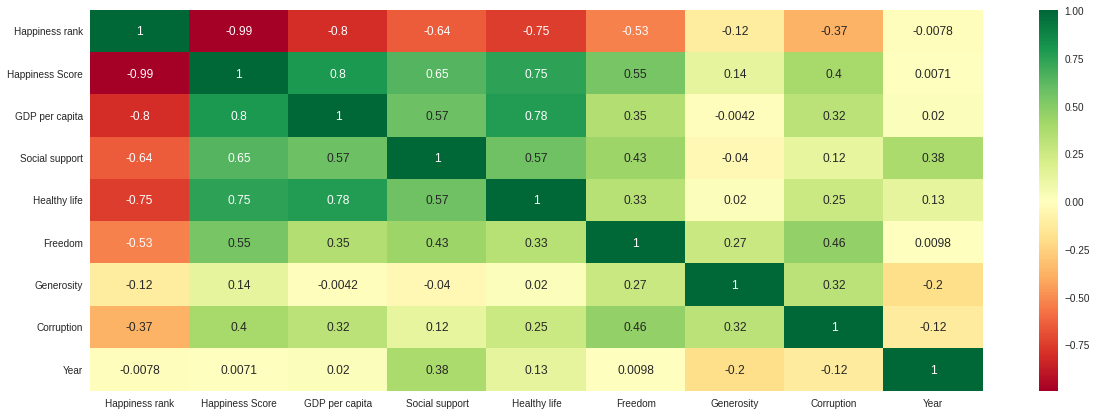

In [179]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(happy_imputed.corr(), annot=True, cmap='RdYlGn')

### **Modelling using OLS Regression**

In [180]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(happy_imputed['Happiness Score'], happy_imputed[['GDP per capita', 'Social support' ,  'Generosity' , 'Corruption','Year', 'Healthy life' , 'Freedom']]).fit()

# Print out the statistics
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.125e+04
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:13:46   Log-Likelihood:                         -631.53
No. Observations:                 782   AIC:                                      1277.
Df Residuals:                     775   BIC:                                      1310.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP per capita     1.1685      0.082     14.259      0.000       1.008       1.329
Social support     0.6529      0.082      7.980      0.000       0.492       0.813
Generosity         0.6163      0.175      3.529      0.000       0.273       0.959
Corruption         0.8196      0.224      3.661      0.000       0.380       1.259
Year               0.0010   4.03e-05     25.911      0.000       0.001       0.001
Healthy life       1.0764      0.131      8.235      0.000       0.820       1.333
Freedom            1.4281      0.165      8.642      0.000       1.104       1.753
==============================================================================
Omnibus:                       15.077   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.312
Skew:                          -0.288   Prob(JB):                     0.000287
Kurtosis:                       3.412   Cond. No.                     2.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#**Building the Model**
### **Train and Test split**

In [181]:
X=happy_imputed.drop(columns={'Happiness rank','Happiness Score'})
y=happy_imputed['Happiness Score'].copy()

In [182]:
from sklearn.model_selection import  train_test_split

X = happy_imputed[[ 'GDP per capita', 'Social support' ,  'Generosity' , 'Corruption','Year', 'Healthy life' , 'Freedom']]
y = happy_imputed['Happiness Score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

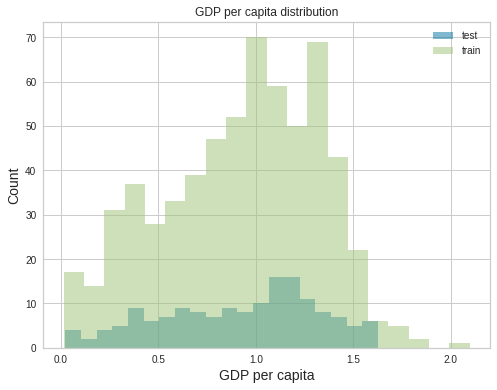

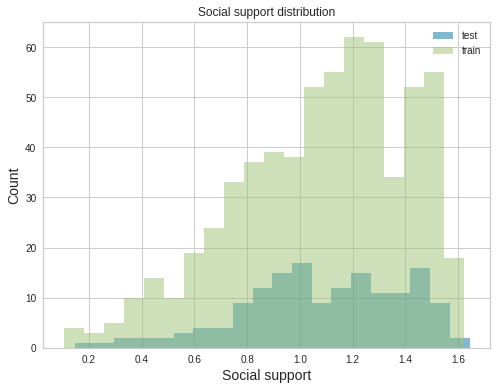

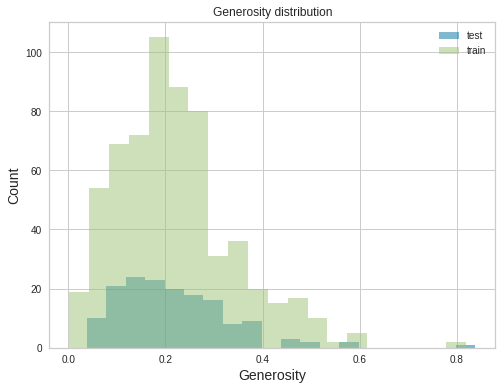

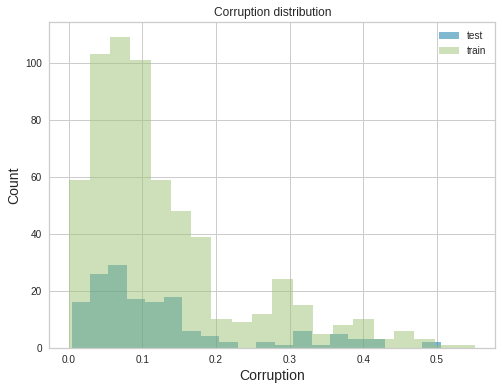

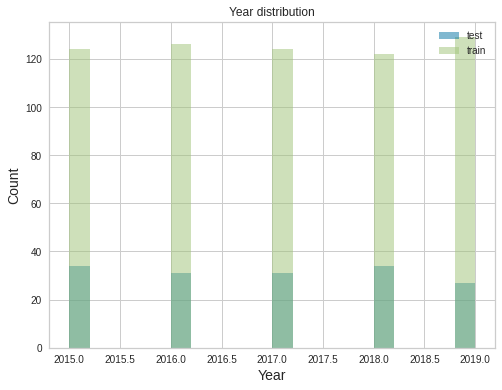

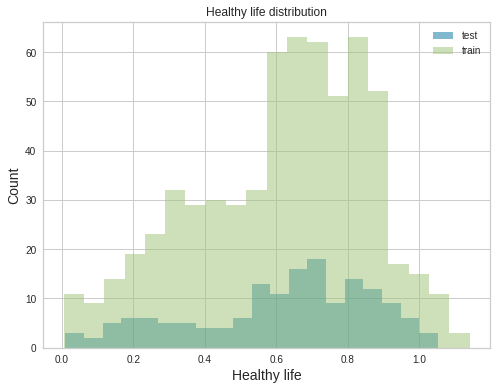

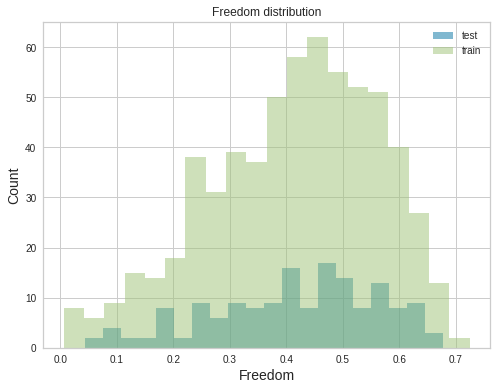

In [183]:
# Looking the data for test, training and validation set
X_test_plot = X_test[[ 'GDP per capita', 'Social support' ,  'Generosity' , 'Corruption','Year', 'Healthy life' , 'Freedom']]


X_train_plot = X_train[['GDP per capita', 'Social support' ,  'Generosity' , 'Corruption','Year', 'Healthy life' , 'Freedom']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

# **Auto_ML**

In [184]:
#Installing Pycaret
# !pip install pycaret[full] --ignore-installed
!pip install pycaret
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.9 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [185]:
from pycaret.regression import *

# **Regression**

In [186]:
happy_new=happy_new.drop(columns="Happiness rank")

In [187]:
reg = setup(data = happy_new, 
            target = 'Happiness Score',
            train_size=0.8,
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=5,
            silent = True,numeric_features=['GDP per capita','Freedom','Healthy life','Social support','Generosity','Corruption','Year'])

,Description,Value
0,session_id,4359
1,Target,Happiness Score
2,Original Data,"(782, 8)"
3,Missing Values,True
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(625, 7)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['GDP per capita',
                                                          'Freedom',
                                                          'Healthy life',
                                                          'Social support',
                                                          'Generosity',
                                                          'Corruption',
                                                          'Year'],
                                      target='Happiness Score',
                                      time_featu

### **Comparing best model using Auto_ML**

In [188]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3823,0.2441,0.4936,0.8088,0.0823,0.0766,0.230
rf,Random Forest Regressor,0.3969,0.2658,0.5148,0.7921,0.0855,0.0792,0.350
lightgbm,Light Gradient Boosting Machine,0.4102,0.2767,0.5251,0.7833,0.0876,0.0819,0.202
gbr,Gradient Boosting Regressor,0.4154,0.2771,0.5255,0.7825,0.0866,0.0822,0.120
ridge,Ridge Regression,0.4349,0.3062,0.5533,0.7604,0.0922,0.0867,0.018
br,Bayesian Ridge,0.4339,0.3066,0.5536,0.7601,0.0923,0.0865,0.018
lr,Linear Regression,0.4337,0.3069,0.5538,0.7599,0.0924,0.0865,0.688
lar,Least Angle Regression,0.4337,0.3069,0.5538,0.7599,0.0924,0.0865,0.020
huber,Huber Regressor,0.4309,0.3074,0.5542,0.7594,0.0926,0.0862,0.030
knn,K Neighbors Regressor,0.4464,0.3325,0.5766,0.7404,0.0954,0.0897,0.022


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4359, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### **Creating Random Forest Model**

In [189]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3858,0.2697,0.5194,0.7796,0.0894,0.0793
1,0.3749,0.2454,0.4954,0.7964,0.0801,0.0733
2,0.4423,0.3107,0.5574,0.7540,0.0913,0.0865
3,0.4252,0.2781,0.5273,0.7952,0.0872,0.0852
4,0.3564,0.2252,0.4745,0.8354,0.0797,0.0717
Mean,0.3969,0.2658,0.5148,0.7921,0.0855,0.0792
Std,0.0320,0.0292,0.0283,0.0265,0.0048,0.0060


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4359, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [190]:
tuned_model = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4043,0.2938,0.5421,0.7599,0.0930,0.0825
1,0.3819,0.2514,0.5014,0.7914,0.0820,0.0751
2,0.4354,0.2950,0.5432,0.7665,0.0888,0.0859
3,0.4379,0.3068,0.5539,0.7741,0.0925,0.0888
4,0.4009,0.2632,0.5130,0.8076,0.0861,0.0803
Mean,0.4121,0.2820,0.5307,0.7799,0.0885,0.0825
Std,0.0215,0.0210,0.0200,0.0174,0.0041,0.0047


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.001,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=4359, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


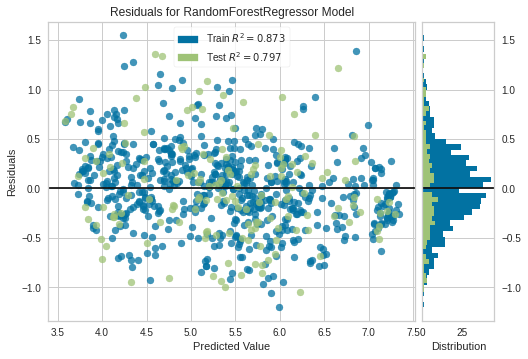

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [191]:
plot_model(estimator = tuned_model, plot = 'residuals')

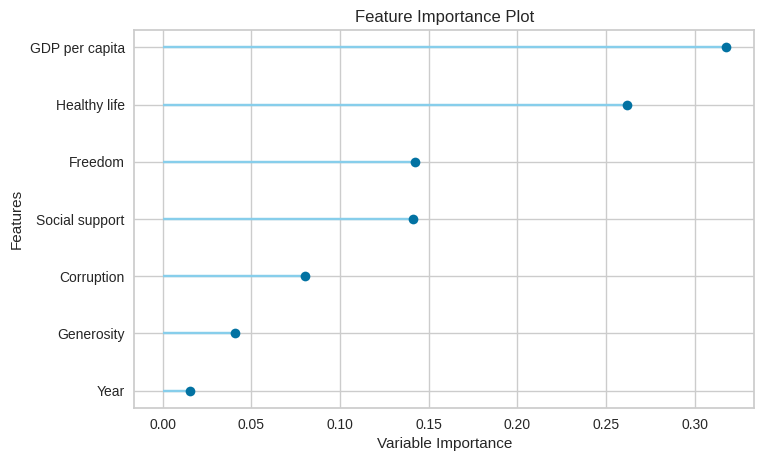

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [192]:
plot_model(estimator = tuned_model, plot = 'feature')

In [193]:
happy_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,782.0,5.379018,1.127456,2.693000,4.50975,5.322000,6.189500,7.769000
GDP per capita,777.0,0.921942,0.401937,0.015300,0.61900,0.985000,1.238000,2.096000
Social support,777.0,1.085332,0.318999,0.104190,0.87119,1.125000,1.330000,1.644000
Healthy life,777.0,0.616356,0.244177,0.005565,0.44300,0.649547,0.809158,1.141000
Freedom,777.0,0.413736,0.149757,0.005890,0.31200,0.432453,0.531220,0.724000
Generosity,777.0,0.219982,0.121445,0.001990,0.13352,0.202000,0.279920,0.838075
Corruption,775.0,0.126407,0.105646,0.001000,0.05500,0.092000,0.156352,0.551910
Year,782.0,2016.993606,1.417364,2015.000000,2016.00000,2017.000000,2018.000000,2019.000000


In [194]:
reg[5]

,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
434,0.477988,0.749598,0.543882,0.804688,0.584717,0.139430,0.50
208,0.460307,0.488625,0.597816,0.574995,0.118110,0.344227,0.25
574,0.444418,0.847421,0.282935,0.739172,0.120813,0.105550,0.75
46,0.590816,0.552526,0.844721,0.472664,0.219571,0.148864,0.00
145,0.129716,0.581829,0.329045,0.467882,0.408786,0.108371,0.00
...,...,...,...,...,...,...,...
641,0.713077,0.940664,0.874447,0.739172,0.354043,0.592999,1.00
699,0.229586,0.643982,0.625995,0.555143,0.272711,0.274430,1.00
425,0.456161,0.644289,0.290550,0.745408,0.089876,0.176838,0.50
308,0.100375,0.130755,0.157639,0.439988,0.355406,0.226837,0.25


In [195]:
data=reg[5]

In [196]:
#Installing SHAP
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Interpret Regression Model using SHAP**

In [197]:
import shap

In [198]:
X100 = shap.utils.sample(data, 100) # 100 instances for use as the background distribution
sample_ind = 20

In [199]:
explainer = shap.Explainer(tuned_model.predict, X100)
shap_values = explainer(data)

Exact explainer: 626it [00:30, 13.46it/s]                         


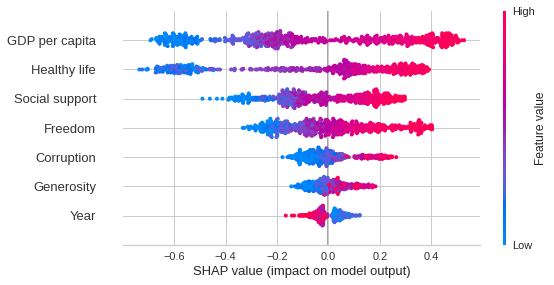

In [200]:
shap.plots.beeswarm(shap_values)

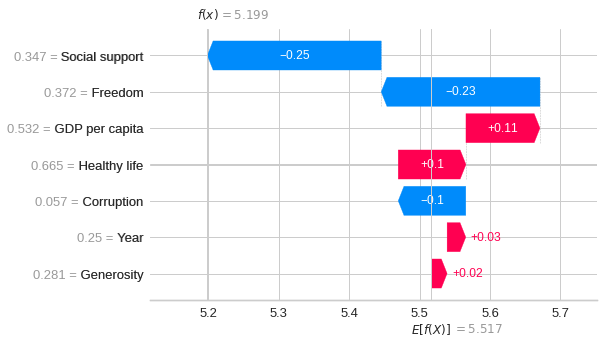

In [201]:
shap.plots.waterfall(shap_values[20], max_display=10)

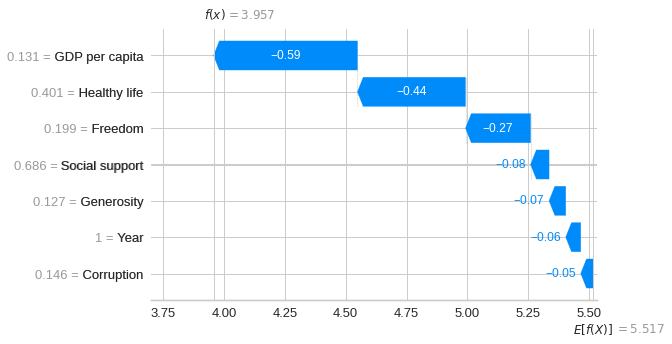

In [202]:
shap.plots.waterfall(shap_values[30], max_display=10)

By looking at the above graphs we can see the GDP per capita and healthy life are responsible for the increase in happiness score, whereas corruption and freedom has opoosite effect on the same.

As Regression is the best model that we have and also used Auto ML to find the best model from that it is clear that regression is the best model.

So I have interpreted Regression using SHAP

All the Goals of the notebook have been successfully completed.

## **Conclusion**

For analysis, we employed SHAP and regression. On the one hand, a country's happiness was most strongly influenced by its GDP per capita. On the other hand, generosity and age made the smallest contributions to a nation's happiness. We can also see that GDP per capita ,healthy life and corruption has effects on the economics of happiness.

# **LICENSE**   
Copyright (c) 2022 udayshelke

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.